# Auto Labelling (Demo)
In this Jupyter notebook, we aim to illustrate the poential of the \[semi\] auto labelling tool. In our example we will use it to label movie categories (original example by author).

In [1]:
import pandas as pd
import numpy as np

from src.toolkit.plot import *
from src.toolkit.autolabel import *

from sklearn.naive_bayes import MultinomialNB

## Input Data
Our input data is a csv file containing text data in the first column. A subset of the [Full MovieLens Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset/home) (first 500 rows) is used for demonstration purposes.

In [2]:
texts_path = "data/movies500.csv"
stopwords_path = "data/stopwords.csv"

movies = pd.read_csv(texts_path)

In [3]:
movies.head()

overview  Action  Romance  \
0  A family wedding reignites the ancient feud be...       0        1   
1  Cheated on, mistreated and stepped on, the wom...       0        1   
2  Obsessive master thief, Neil McCauley leads a ...       1        0   
3  An ugly duckling having undergone a remarkable...       0        1   
4  A mischievous young boy, Tom Sawyer, witnesses...       1        0   

   Science Fiction  Thriller  War  Western  
0                0         0    0        0  
1                0         0    0        0  
2                0         1    0        0  
3                0         0    0        0  
4                0         0    0        0

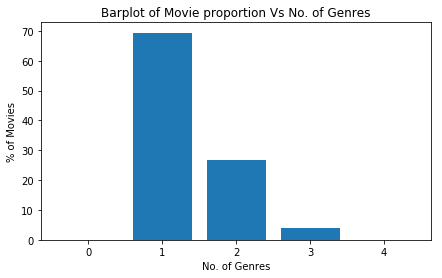

It seems that most movies tend to only have 1 genre. This makes sense!


In [4]:
moviesGenre = movies.iloc[:, 1:]
numGenres = list(range(5))
labelCount = [round((moviesGenre.sum(axis=1)==i).mean(),3)*100 for i in range(5)]

barplot(numGenres, 
        labelCount, 
        figsize=(7,4), 
        title='Barplot of Movie proportion Vs No. of Genres',
        x_label='No. of Genres',
        y_label='% of Movies')

print("It seems that most movies tend to only have 1 genre. This makes sense!")

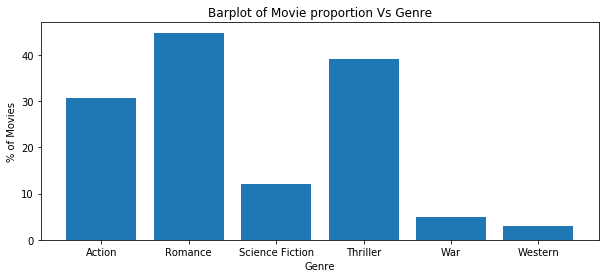

We appear to have a skewed dataset. There isn't as much science fiction, war and western films.
Combined with the relatively small dataset used, this can make it difficult to label our dataset!


In [5]:
genreTitle = moviesGenre.columns
movieCount = (round(moviesGenre.mean(axis=0),3)*100).tolist()

barplot(genreTitle, 
        movieCount, 
        figsize=(10, 4), 
        title='Barplot of Movie proportion Vs Genre',
        x_label='Genre',
        y_label='% of Movies')

print("We appear to have a skewed dataset. There isn't as much science fiction, war and western films.\n\
Combined with the relatively small dataset used, this can make it difficult to label our dataset!")

## Data Preprocessing
For text data, it is important to perform preprocessing. In our case the following will be performed.
* Vectorise data. Convert text data into a numerical format.
* Prepare text. Some operations are removng special characters, digits and stopwords etc. 
* Join bigrams that appear frequently into one word.

In [6]:
corpus = movies['overview']

preprocessor = Preprocessor()

# Text Preprocessing
preprocessed_corpus = preprocessor.corpus_preprocess(corpus=corpus, stopwords_path=stopwords_path)

# Replace bigrams
movies['overview'] = preprocessor.corpus_replace_bigrams(corpus=preprocessed_corpus, min_df=50, max_df=500)

## Generate Recommended Labels
Here we will build the label dictionary. Running the following code will generate recommended words and allows us to pick relevant words from the dictionary. The recommended word dictionary may look daunting, but it is simple to use!

Explaining the matrix: Each row represents a 'topic' that the model has identified. Therefore, there may be \[multiple\] rows that represent themes like 'romance', 'thriller' etc!

Go ahead and run the following snippet of code to continue!

In [7]:
n_words = 20  # CHANGE THE NUMBER OF WORDS RECOMMENDED (IF YOU WANT TO)

# Returns a matrix of recommended words
topic_model, dtm, best_n = recommend_words(corpus) 
topic_model.show_topics(dtm=dtm, best_n=best_n, n_words=n_words)

0        1           2          3          4          5   \
0        man    demon    convince      story  discovers  political   
1       love     fall      french    student       king        two   
2      young  husband         try    officer  beautiful      story   
3     killer   serial   detective        law     female     victim   
4   daughter     wife        face      leave     suffer        die   
5       team     stop        evil        try     former        cop   
6      woman     town        come     pursue      small  notorious   
7       film    story        work       tell       base        red   
8        get    thing      friend         go       best      marry   
9       find      new         way       time        hit        job   
10      take      one        meet     become       plan        job   
11  american      war  expatriate      paris     affair      world   
12    family   father      search       year      irish        son   
13      drug     want        name  operation       lord      local   
14      life     move       learn  housewife     friend       four   
15    school     girl        high     parent    teacher         go   
16  criminal   police      leader       kill        run       know   
17    murder      two         run     accuse    project        put   

            6           7           8            9             10  \
0        guest      friend        true         like          look   
1         play    romantic       story           dr   counterpart   
2    dangerous        help         boy         home        escape   
3     violence      person         gay          one          lead   
4          car    accident      second         poor        castle   
5     computer       agent         kgb      protect         steal   
6    beautiful  mysterious        work       comedy         along   
7       comedy         set         boy      strange         world   
8         tell         old        help     marriage     boyfriend   
9       secret         die      friend         make           mob   
10      decide     involve       night          son         large   
11          ii      arrive      france         meet       control   
12    neighbor       widow    marriage         farm  relationship   
13        sell         cia  undercover        agent        prison   
14         day         end     lesbian         year          best   
15        trip     society        come         city       teenage   
16       group         old       money       kidnap          gang   
17  girlfriend       crime         boy  investigate          deal   

              11        12       13           14          15          16  \
0           know      fear  pretend       nature    confront     descend   
1       exchange     marry  brother         tale      famous  mysterious   
2   relationship       war     girl          men        name      doctor   
3            two       duo     clue  personality  journalist        past   
4           rule      need   become        begin         two        look   
5          world    rescue  russian         plan         use        chip   
6     successful      show     move         many     compete       dream   
7          bring     novel    movie       studio     village   adventure   
8           hire       cop   mother     business         try     brother   
9          bring       bos     work  advertising     ancient       human   
10          case       new  someone    blackmail       power        kill   
11        fellow     fight    civil     struggle      writer       south   
12         wound      face    local   adaptation        fear     captain   
13        dealer      work     help       police         eye        lead   
14     apartment      make   invite     threaten        good     student   
15           age      gang      new          mrs        look       child   
16          pose  mountain     rich         cult     revenge        lead   

## Create labels dictionary
First lets look at the recommended words. It seems like row 1 and row 8 are themes related to 'romance', lets extract the words 'love', 'french', 'romantic', 'marry' from row 1 and 'marriage', 'boyfriend', 'wife' from row 8.

Now, we need to create the labels dictionary. In this demo, the dictionary was already created. However, go ahead and look at the data at `data/labels.csv`, the romance data was taken from row 1 and row 8!

You can also identify that some rows more closely relate to the other themes.

In [8]:
labels_path = "data/labels.csv"
labels = pd.read_csv(labels_path)

labels.head(10)

Action    Romance Science Fiction   Thriller       War   Western
0  criminal       love         science     killer       war  criminal
1      kill     french             NaN  detective     world       NaN
2    kidnap   romantic             NaN        law        ii       NaN
3      gang      marry             NaN     victim  struggle       NaN
4   revenge   marriage             NaN        cop       NaN       NaN
5   violent  boyfriend             NaN      agent       NaN       NaN
6       NaN       wife             NaN        kgb       NaN       NaN

## Enrich Labels Dictionary
In this step, we will use the initial labels dictionary we create as a seed to generate more recommended labels.

In [9]:
autoLabeller = AutoLabeller(labels, corpus, movies)
enriched_labels = autoLabeller.train(n_words=20)

enriched_labels.head(10)

Action  Romance Science Fiction   Thriller            War    Western
0  intense   serial          danger      civil           club     serial
1     fall     fall        personal  detective           fall     danger
2  married     love         resolve   attorney        holiday  detective
3  resolve   comedy            case       gold     expatriate   attorney
4     love  science           havoc     design          world       case
5    marry    marry          comedy      sight          slave       wife
6     wife    world         science      world         refuse        cop
7    clean     wife           marry    missile  disappearance       clue
8  violent      war            wife        cop            war     victim
9     gang   center          reason      clean          chase       late

Unfortunately, our model does not give good recommendations for Science Fiction and Western due to the skewed training set (limited SF and Western dataset). What this demostration illustrates that if you have an imbalanced and small dataset, the auto labelling tool will perform less optimally. This is an expected result as the training data does not contain adequate amounts of data for these topics.

## Model Application
The model utilises enriched labels, trains and applies multinomial naive bayes on input dataset. 

**Note that it can take awhile to run**.

In [10]:
mnb = MultinomialNB()
ypred = autoLabeller.apply(mnb)

## Output Data
Now lets look at the labels that the model has generated.

In [11]:
labelled_path = "data/movies500_labelled.csv"

output = movies[["overview"]].join(ypred)
output.to_csv(labelled_path)
output.head(5)

overview  Action  Romance  \
0  family wedding reignite ancient feud nextdoor ...     1.0      0.0   
1  cheat mistreat step woman hold breath wait elu...     0.0      0.0   
2  obsessive master thief lead topnotch crew vari...     1.0      1.0   
3  duckling undergone remarkable change harbor fe...     0.0      1.0   
4  mischievous young boy witness murder becomes f...     0.0      0.0   

   Science Fiction  Thriller  War  Western  
0              0.0       0.0  1.0      0.0  
1              0.0       0.0  1.0      0.0  
2              1.0       1.0  0.0      0.0  
3              0.0       0.0  1.0      1.0  
4              0.0       1.0  0.0      0.0

## Evaluate Model
As this dataset already has labels, we may evaluate the model using the precision, recall and f1 score. Seems like our model performs well on romance. It appears that the model may need to be improved for the remainder of the data. This is expected as there are insufficient training data and labels.

In [12]:
evaluate_predictions(movies, ypred, labels, split=0.2, random_state=42)

Action  Romance  Science Fiction  Thriller     War  Western
Precision  0.2162   0.7273           0.1944    0.5000  0.0222      0.0
Recall     0.2759   0.6531           0.7000    0.3333  0.2500      0.0
F1-score   0.2424   0.6882           0.3043    0.4000  0.0408      0.0

### Note:
In the original model, the performance of the model is better. However demonstration purposes, speed is prioritised to showcase the capabilities of the model.

Original model on 21500 rows

<img style="float: left;" src="data/images/laiyi_score.png">